 # Scikits : machine learning  
     시간이 지나서 필요없는것은 deplicate 시킨다 
     estimator  
     transformer ( 전처리 ) 

      model 의 parameter 을 가져온다  ( 한번에 하나의 모델만 가능 ., tensorflow 는 복잡한 모델 가능 ) 

      문제해결하는 도구 : simulation / optimization / datamining(규칙을 탐구) 
     scikits 에서 모델을 만들면 datamining 계통이다. 

     model 을 통해서 일반화된 문제를 해결한다. 
     
     scikits 에서 model 을 만들어서 하려는 것 : 분류(classification) , 예측(regression) , 군집 ( Clustering)
    
 model
     정보기반 (Decision Tree, Random Forest, Ada boost, Gradian Boost , XGboost , 앙상블, stack model )
     확률기반 Naive bayes (text mining 할때 많이씀)
     유사도기반  : KNN ,K-means, 추천
     오차기반 : ANN , SVM ( 서포트 벡터 머신 ) 
    
 feature engineering ( 전처리, 변형 ) : scikits 에서 이런 거 많이 지원한다 
     ( ex)  변형 중 select : model select, variable select(=변수선택),  특성추출 

   model select : training data, test data 가 필요하다  
   (training data 에 특화된 모델이 나옴 = 과대적합이 높다,  요새는 test data 말고도 validation ? 3개로 함)
   k-folds 를 통해서  나누는 것을 보고 model select  라고 한다
   
   variable select  를 하는 것들이 FA(요인분석: 유사한 변수있으면 하나로묶는다 ),
                                         PCA(주성분 분석 : 데이터에 잡음이 껴있을때, 
			MDS (다차원 척도법)


변수중요도를 알아보기위해서 상관계수행렬,공분산행렬을 구한다.  고유값분해를 하면 고유치, 고유벡터얻을수있다 , 
다중공선성(x끼리 영향줌)의 문제 scikits 에서 해결하는 방법 : Lasso, Ridge, Elasticmat 



  
     그라디언 부스트   xgboost (캐글에서 가장 많이 나온 모델 ) 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [38]:
x = np.array([0.0, 1.0 , 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x,y,3)  # polyfit -> 방정식의 계수를 찾아라 (3차원으로 찾아라)
print(z)
print()
p = np.poly1d(z)  # 찾은 계수를 통해 방정식을 만든다.      
print('방정식', p)

p(0.5)
p(3.5)
p(10)
p(3.0)

# scipy 가 하는 것 : optimization , interpolation, 미적분 , fit  을 지원하는 것이 scipy 패키지이다 


[ 0.08703704 -0.81349206  1.69312169 -0.03968254]

방정식          3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


0.06825396825396512

-0.7126984126984173


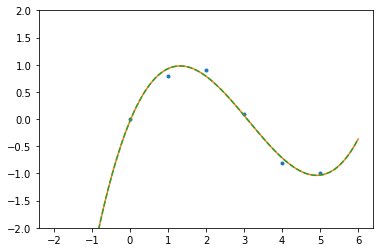

In [13]:
p30 = np.poly1d(np.polyfit(x,y,3))  #poly1d : 방정식으로 변환해주는 것이다  

print(p30(4))  #p30 이라는 방정식에 4라는 x 값을 넣으면 높이값을 구해준다

xp = np.linspace(-2,6,100)  #linspace : -2 에서 6까지 100등분 해준다 , 방정식으로 구한 값을 리턴해준다 
_= plt.plot(x,y,'.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)
plt.show()

#제대로 fitting 하고 있는 것을 확인했다

AttributeError: 'tuple' object has no attribute 'ndim'

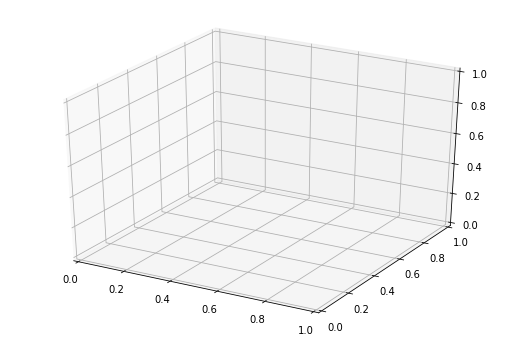

In [25]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x **2 
           +np.sin(y) + 0.05 * y ** 2)

x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)

X, Y = np.meshgrid(x,y)
Z = fm,((X, Y))
X, Y = np.meshgrid(x,y)
Z = fm,((X, Y))


#blackbox 일반이론
fig = plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')

surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2,
                      cmap = mpl.cm.coolwarm,linewidth = 0.5, antialiased=True)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)


# GD : Gradient descent
# GD 의 경사하강법 ( 쓰이는 곳 : ANN )  
# 경사하강법의 문제 : 지역해 문제 , fitting 시간문제(학습율 문제)

# 지역해 문제를 해결하는 것 : momentum ( 다른방향으로 힘을 더 준다 ) 
# 학습율 문제 해결 : 처음은 많이, 그리고 점점 작게 

# 즉 그림을 보면
# 1. 지역해에 빠질 수 있어서 모멘텀을 줘야한다.  
# 2. 그림의 빨간부분에서 시작하면 내려가는데 오래 걸림 


# 이런 최적해를 찾아가는 것을 optimization 한다고 한다

In [34]:
# 무작위 대입법
import scipy.optimize as spo
def fo(p):
    x, y = p
    z= np.sin(x) + 0.05 * x **2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x,y,z))
    return z
output = True
opt1 = spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish = None)  

#brute 함수가 수의 조합    ( 여기서는 (-10, 10.1, 5), (-10, 10.1, 5)) )   을 무작위로 대입해준다
print(opt1)


output = False
opt1 = spo.brute(fo,((-10, 10.1 , 0.1), (-10, 10.1, 0.1)), finish = None)
print(opt1)  # 더 미세하게 줬더니 -1.4 , -1.4 가 나왔다

# 옛날엔 이렇게 찾아지만 지금은 ANN 을 통해서 최적해를 찾는다. ( 행렬곱을 이용해서 최적해를 찾아간다 ) 

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120
[0. 0.]
[-1.4 -1.4]


In [35]:
# 어떤 것이 최적점인지 계속 찾아가는 중이다 

output = True
opt2 = spo.fmin ( fo, opt1, xtol = 0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2
fm(opt2)
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)   # 할강단체법
#2, 2 근접점을 찾아봐라는 뜻

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757
 -1.4270  -1.4288  -1.7757
Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [ ]:
# 선형회귀 ( Linear regression )  :  기울기와 절편을 찾는 것

# 선형회귀에서 전제조건 
#   1) 선형성   -> 선형성을 띄지 않는것 = 비선형성 
#               -> scikits 에서는 polynomial (다차원계수를 찾아준다) + linear regression 을 이용해서 비선형문제를 해결한다 
#                ( * 비선형을 안하는 이유 : 과적합 되기 때문이다 ) 
#   2) 정규성  :  오차가 정규분포를 띄어야한다 (정규분포 문제해결하는 것이 GLS)
#   3) 독립성  :  변수간에 다중공선성이 있으면 안된다, 하나의 변수에 자기회귀가 있으면 안된다 (자기회귀가 있으면 시계열분석해보자)
#               -> scikits 에서는 다중공선성을 해결하기 위해서 lasso(절대값 규제) , Ridge(제곱 규제) , ElsticNet(lasso 와 Ridge 합친 것 ) 을 이용한다
#                Regulization (규제 ) 은 에러가 이미 존재한다고 보고 회귀 (에러가 이미 존재한다고 보고 최적점까지 가지 않는다 -> 과적합 방지 ) 

#   4) 등분산성  : 이산성을 고려한 모델을 사용 

# 이 조건을 전부 만족하는 건 별로 없다


In [47]:
from sklearn.datasets import make_regression
import statsmodels.api as sm  
bias = 100        
X0, y ,w = make_regression(         #
    n_samples = 200, n_features= 1, bias= bias , noise=10, coef= True, random_state=1)

#( statsmodels 에서 회귀분석시 )  선형회귀시 범주형은 상수등록을 해준다 
# 상수별로 회귀분석을 실행함
X = sm.add_constant(X0)  # 상수를 고려 -> 절편을 고려해라  (원래 statsmodels 의 회귀분석은 상수항 고려하지 않으므로 여기서 add_constant 함수를 이용해서 추가한다 )
y = y.reshape(len(y),1)  # 
w

array(86.44794301)

In [43]:
import numpy as np
w = np.linalg.inv(X.T @ X) @ X.T @ y    # 행렬곱을 한다는 것이다 
w # 위에서 w가 86.4479 였다. 여기선 86.9 로 얼추 비슷 -> 즉 행렬곱 에서 ANN 개념이 나온다. 

array([[99.79150869],
       [86.96171201]])

In [48]:
import statsmodels.api as sm
# ordinary least square : 회귀모델

model = sm.OLS(y, X)  # statsmodels 에서 ordinary  least suqare  를 이용
                      # y와 x 를 이용해서 선형 회귀를 했다 
result = model.fit()
print(result.summary())

result.params  # 회귀한 결과가 나온다 절편이 99.79 로 100 에 근사,  86.9617 도 근사하고 있다 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          8.17e-182
Time:                        13:07:37   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

array([99.79150869, 86.96171201])

In [ ]:
#Dep. Variable: 종속변수가 뭐냐
# R-squared : 설명력 ( 회귀제곱합 / 총오차제곱합 )
# Model : OLS   -> 최소제곱법
# Adj. R-squared   -> 수정결정계수
# F-statistic:   -> F value 가 뭐냐 ?  분산비이다
# Prob (F-statistic)  을 잘 보자  -> 확률값으로  0.00000xxx 이므로 유의미하다 ( 모델이 유의미하다 ) 
# AIC ,BIC  : 모델의 복잡도에 따라 평가해주는 지표이다    작을 수록 좋다
#  Jarque-Bera (JB)  : 정규성 확인 가능 ( 0이 기준이다 , 0이 정규성이 있다) -> 1.059-> 정규성이 조금 벗어낫다
# SKew : 왜도  ( 기준점 : 0 )
#Durbin-Watson : 자기상관성 확인 가능 1을 기점으로 2이면 자기상관성이 없다 
#Kurtosis : 기준이 3 (표준정규분포일때 3 )- ---> 살짝 정규분포에 벗어나있다라고 보면됨
# Cond. No.    --> 다중공선성을 보는 값이다 -> 실제 다중공선성이 일어나면 경고메세지가 뜬다


# 최소제곱법에 대해 보았다.
y = 86.96171291 * x + 99.79150869

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()  # 보스톤 집값에 대한 예측
model_boston = LinearRegression().fit(boston.data, boston.target) 

In [56]:
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)    
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
print(dfX.head())
dfy.head()  # 평균값으로 집값을 예측한다



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [57]:
# 위에서는 데이터프레임으로 변경해서 내요응ㄹ 확ㅇ니했다.
#  열의 네임은 boston.feature 에 들어가있다. 
boston.feature_names   # 속성의 열이름 확인

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [58]:
#  변수가 13개 -> 계수
# 독립변수 -> 종속변수 
# 독립, 종속변수를 fit 에 넣으면 계수 즉 parameter 를 구해준다

model_boston = LinearRegression().fit(boston.data, boston.target)



In [59]:
model_boston.coef_  #scikits 에서는 저렇게 coef 하고 _ 가 붙는다. 결과를 확인하는 다른것들도 그런다

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [61]:
model_boston.intercept_  

36.459488385089855

In [64]:
predictions = model_boston.predict(boston.data)  #boston.data 값에 대해서 예측해봐라


In [65]:
predictions-boston.target  # 예측값에서 실제값 빼주면 잔차가 된다

array([ 6.00384338e+00,  3.42556238e+00, -4.13240328e+00, -4.79296351e+00,
       -8.25647577e+00, -3.44371554e+00,  1.01808268e-01, -7.56401157e+00,
       -4.97636315e+00,  2.02621071e-02,  3.99949651e+00,  2.68679568e+00,
       -7.93478472e-01, -8.47097189e-01,  1.08348205e+00, -6.02516792e-01,
       -2.57249021e+00, -5.88598653e-01, -4.02198894e+00,  2.06136033e-01,
       -1.07614247e+00, -1.92896331e+00,  6.32881292e-01, -6.93714654e-01,
        7.83383155e-02, -5.13314391e-01, -1.13602345e+00, -9.15257194e-02,
        1.14737285e+00, -1.23571798e-01, -1.24488241e+00,  3.55923295e+00,
       -4.38894264e+00,  1.18275814e+00,  2.06758913e-01,  4.91463526e+00,
        2.34193708e+00,  2.10891142e+00, -1.78497388e+00,  5.57625688e-01,
       -6.84897746e-01,  1.42056414e+00, -9.61337195e-02, -9.02072745e-02,
        1.74149176e+00,  2.79669817e+00,  4.23200323e-01,  1.43655088e+00,
       -5.29344623e+00, -2.19392249e+00,  1.58152535e+00,  3.47222285e+00,
        2.65585080e+00,  

In [68]:
x=np.array([0.0,  1.0,  2.0,  3.0, 4.0 , 5.0])
y=np.array([0.0,  0.8, 0.9 , 0.1, -0.8,  -1.0 ])
z=np.polyfit(x,y,3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [81]:
X = [[0.44, 0.68], [0.99, 0.23]]
y= [109.85, 155.72]
X_test = [[0.49,0.18]]


In [82]:
# 싸이키트는 '다차방정식으로 변환 + LR '을 통해서 비선형회귀를 해결한다했다
  # 데이터가 2차 -> 포물선 형태로 판단 
    # 다차방정식의 특성을 추가 

poly = PolynomialFeatures(degree=2)
# sckitis 에는 estiamtor (parameter 추정기, = 기울기와 절편을 추정 /  predict=예측한다 ) 

X_ = poly.fit_transform(X)  # transformer = fit + transform  같이해라  
# 즉 poly 는 fit 와 transform 을 통해 2차원으로 fit 하고 데이터를 transform (변형) 한다는 것!!!!
#   X 는 원본데이터고 아래 X_test 는 제대로 작동하는지 보려는데이터

In [84]:

X_test_ = poly.fit_transform(X_test)

In [85]:
lg = LinearRegression()  # 선형회귀
lg.fit(X_, y)
lg.coef_            # 다차 방정식 계수가 나온다  

array([  0.        ,  19.4606578 , -15.92235638,  27.82874066,
        -2.52988551, -14.48934431])

In [86]:
lg.predict(X_test_)  # 비선형 예측이 된다 

array([126.84247142])

In [95]:
# 로지스틱 회귀분석  : 0에서 1사이 값이 나온다 
# 즉 회귀분석을 한 다음에 mapping 하는 것이다   -> 결과값을 logic function 값으로 매핑 하는 것이다. ( 확률값도 0에서 1사이!)
# --> 로지스틱 회귀분석은 확률값으로 나오는 것이라고 보면 된다

#  연속된 독립변수들의 입력이 들어왔을때, 이산적 결과를 판정하고 싶을때 쓰는 것이 로지스틱 회귀분석이다. 
# ex ) ( 나이, 돈, 성별 등등이 들어와서 대출을 해줄지 말지 결정한다)
# 로지스틱은 어떤값이 들어오더라도 0또는 1값으로만 출력된다
# 0.5 를 기준으로 해서, 0.5 보다 크면 참/  0.5보다 작으면 거짓  ( 참과 거짓 2가지로 이진)
#   발전 시켜보자  만약 종속변수가 2개 이상이라면????  ---> 이럴땐 sotfmax  



# 위에서  배운 Regression 은 연속된 수치가 들어왔을때, 결과도 연속된 수치로 출력되었다 !  ( 독립변수도 연속된 수치, 종속변수도 연속된 수치)
 

In [ ]:
# sklearn : 싸이키트를 패키지한것,
# linear_model :: 싸이키트 아래에 있는 패키지
#

C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


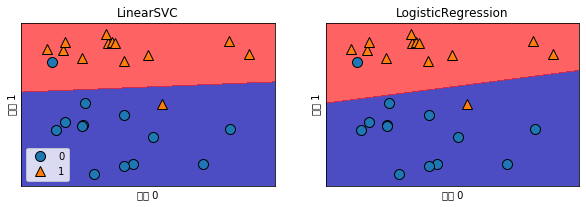

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
X, y = mglearn.datasets.make_forge()  # 연속적 데이터가 들어간다 

fig,axes = plt.subplots(1,2, figsize=(10,3))                         #subplot 를 통해서 도화지를 만들었다 사이즈는 가로 10, 세로 3  -> 1행2열로 만들라했으니 axes 는 2장이다.
for model, ax in zip([LinearSVC(), LogisticRegression()],axes):  #LInearSVC  :( support vector classifier : 서포트 벡터로 생성된 분류기 )   #axes 의 1장은 sVC 와,axes 다른건 로지스틱 이 들어간다. 
#axes 는 도화지 -> 2개가 만들어짐 , 도화지1개에는 LinearSVC() 다른한개에는 LogisticRegression() 를 매핑하라!!!
    # logisticregression  이 ax/  linearSVC -> model  
    clf = model.fit(X,y)        # model.fit 하게 되면 자동으로 회귀분석하게 되고, 계수들을 구해준다  
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7)  # plot_2d_separator 을 하면  엑스로 들어온값을 clf 로 매핑해라  , ax 는 도화지이다  # alpha 를 통해서 살짝 투명하게 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)  # 0번째 있는 것, 1번째있는 것을 x, y 값으로 출력하라는 뜻이다 
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

In [ ]:
# zip 에서 모델을 인스턴스하고 model.fit 을 통해서 fit 하고
# 예측을 해보았다.           linear logistic 에서는 예측, 로지스틱에서는 분류

In [ ]:
# fit : 데이터 점점 들어올떄 맞춰주는 것 최적으로 

In [ ]:
# 서포트벡터 : ANN 이 최적화된 것이 서포트벡터이다!  

In [114]:
# select : model_select, 변수선택, feature extraction  3가지 

from sklearn.datasets import load_breast_cancer      # 유방암정보 (2차원) 
from sklearn.model_selection import train_test_split  
# train_test_split 많이 쓰는 건데 훈련, 테스트 데이터를 랜덤으로 분리시켜준다 
#   -> 기본적으로 훈련데이터가 0.75,  test data 를 0.25 비율로 랜덤하게 분리시킴



cancer = load_breast_cancer()  #breast_cancer 라는 데이터를 불러와서 그 data (독립변수 ) 와  target( 종속변수 ) 이 cancer 로 들어갔다 

print(cancer.feature_names)
print(cancer.data.shape)
# 데이터프레임으로 만들고싶다면?
import pandas as pd
data=pd.DataFrame(cancer.data)
print(data.head())



X_train, X_test , y_train, y_test = train_test_split(  #train_test_split 를 통해 나눈값이 4가지로 들어간다 -> X_train, X_test , y_train, y_test 4가지 
    cancer.data, cancer.target, stratify = cancer.target,   #stratify : 층화시켜라 ( 랜덤도 좋지만 다 랜덤으로 했을때 암인 사람끼리만 모여버릴수도 있으므로 타켓을 중심으로 나누라는 뜻에서 넣은 것이다 . 한쪽에만 몰리지 않게 섞어서 비율로 하라는 뜻이다!!!)
    random_state=42)                                          

logreg=LogisticRegression().fit(X_train, y_train)

print("훈련세트점수:{:.3f}".format(logreg.score(X_train, y_train)))  # score 는 정분류율을 계산하라는 뜻 ! (실제 true 일때 예측한것true/ 실제 false 일때 예측도 false 인 것 )
print('테스트 세트 점수 : {:.3f}'.format(logreg.score(X_test, y_test)))

# 정분류율,ㅡ 오분류율, 민감도, 재현율  찾아보기 , 특이도    (https://codedragon.tistory.com/6943)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.1

C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [121]:
import numpy as np
from sklearn.model_selection import GroupKFold
X = np.array([[1,2],[3,4],[5,6],[7,8]])  #  데이터4개 (관측치4개) -> 변수 2개   (4x2)
y = np.array([1,2,3,4]) # y도 4개(종속변수)       --> 1,2 일때 1  3,4일때 2   5,6일때 3   7,8일때 4   라는 것!!!!
groups = np.array([0,0,2,2]) # 그룹을 구분하고 있다 
group_kfold = GroupKFold(n_splits=2) # 2개로 나눌것이다
group_kfold.get_n_splits(X,y,groups)#   이것의 의미는 아래처럼 나눈다는 것이다

#1,2   1
#3,4   2

#5,6   3
#7,8   4
print(group_kfold)
# model_selection : 모델데이터를 구분 


for train_index, test_index in group_kfold.split(X, y ,groups):
    print("TRAIN", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

GroupKFold(n_splits=2)
TRAIN [0 1] TEST: [2 3]
[[1 2]
 [3 4]] [[5 6]
 [7 8]] [1 2] [3 4]
TRAIN [2 3] TEST: [0 1]
[[5 6]
 [7 8]] [[1 2]
 [3 4]] [3 4] [1 2]


In [ ]:
#model selection 을 보았다 아래에서는 feature selection 을 보자

In [123]:
# feature selection 

from sklearn.datasets import make_friedman1  # 데이터 생성
from sklearn.feature_selection import RFE    #RFE  :  recursive feature elimination  ( 재귀적으로 특징을 제거한다 )=스스로!
from sklearn.svm import SVR
# 열변수10개 관측수 50,  (50명에게 10개의 변수에 대해 조사했다)  
X, y = make_friedman1(n_samples = 50, n_features=10, random_state=0)
estimator = SVR(kernel='linear')  # Regression(예측하는것),  SVC:classification (분류하는것),  SVR 선형회귀랑 비슷한것?!    ?? 검색해보기
selector =RFE(estimator, 5, step=1) # 변수를 5개만 남기겠다.(step=1 --> 1번에 1개씩 제거하라  )  즉 10개니까 5개를 지워야한다. 
# 가장영향력없는 변수를 줄이고줄이면서 5개만 남긴다. (변수를 제거하는 이유 : 잡음 제거 ) -> 영향력없는 변수들은 오히려 종속변수에 나쁜 영향을 미칠 수도 있다 

selector = selector.fit(X,y)    
selector.support_   
selector.ranking_     # 어떤 놈이 중요했는지 등수로 보여준다. 

# 결론 : 10개 변수에서 5개로 줄었다

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [ ]:
#     https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# 변수선택하고싶을때  찾아봐라


In [124]:
sample = ['problem of evil', 'evil queen','horizon problem']

# sample 에는 중복되지 않는 단어가 5개 이다.



In [126]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()  # 단어를 세는 것이다 ( 텍스트 마이닝을 하고 있다 ) 
#CountVectorizer 함수는 feature_extraction 안에 있다! 

X = vec.fit_transform(sample)  # transform 이 sample 의 각 단어에 evil, horizon, of,problem,queen 이 몇개있는지 세준다 
print(type(X))
X
pd.DataFrame(X.toarray(), columns= vec.get_feature_names())



#ex.  자소서 썼는데 이런식으로 단어를 쭉 뽑아와서 매칭했다 ->  퍼센트높은 사람이 합격하는 것이다. 


<class 'scipy.sparse.csr.csr_matrix'>


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec= TfidfVectorizer()  # Term Frequency (단어의 빈도) + inverse document frequency(역문서 빈도)   
# 단어수/전체문서   ???/  자주등장하지 않는 단어에 가점을 주는 것이 역문서빈도이다

X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [ ]:
# 분류
# 예측



In [130]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0,2,1,3]
y_true = [0,1,2,3]
accuracy_score(y_true, y_pred) # 정확도  #
accuracy_score(y_true, y_pred, normalize=False)

2

In [133]:
# SVC
#cross validation : 
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target  # iris.data-> X    iris.target->y 이다  

clf = svm.SVC(gamma='scale', random_state=0)  # 모델을 가리키는 이름 = clf  # gamma : 커널의 모양을 통제  
cross_val_score(clf,X,y, scoring = 'recall_macro', cv=5)  #cross  validation 을 5개로-> 데이터를 5덩어리로 나눈다. (4개는 train data, 1개는 test data)로 하고 모든게 1번씩은 test data가 된다.


# 5번테스트하니까 결과도 5개가 나온다
# 딥러닝 나오기전에 서포트벡터머신 정말 많이 썼었다(고차원을 좋아한다)
## 커널  : 뜨게 만드는것  , 커널의 모양을 통제하는 것은 감마
# SVC : rbf(방사형 커널 ) , poly , sigmoid(0에서1사이의 값으로 return 된다)
 

#score 을 재는데 recall 로 잰다.  (-> 민감도를 말하는 것)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [135]:
#  척도
from sklearn.metrics import confusion_matrix
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
confusion_matrix(y_true, y_pred)
#종류가 아래처럼 만들어져서 카운드된다. 아래와 같은 것을 혼동행렬이라고 한다!! (confusion_matrix)  
   # 0, 1, 2
#0   2  0           0일때0인거 2개, 2일때 2 인것 2개 이런식으로 하는 것
#1   0  0 
#2   0  
 
    


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [138]:
import numpy as np
import sklearn.metrics as metrics
y = np.array([1,1,1,1,0,0]) # 실제값 
p=np.array([1,1,0,0,0,0])  # 예측값
accuracy = np.mean(np.equal(y,p))  # 정확도
right = np.sum(y*p ==1 )  # 1로 같은 것 
precision = right / np.sum(p)    # 맞은놈/예측값 = 정밀도 = TP / (TP+ FP)              #tp : true 인데 positive 라고 한것,
recall = right/np.sum(y)          # recall 은   실제맞춘것/실제값  = 민감도 = TP / ( TP+TN )      # TN : ture 인데 negative 로 예측
f1 = 2 * precision* recall/(precision+recall)  #    정밀도와 민감도를 가지고 구한 것

## 여기서 실제값은 y 이다. p 는 예측값이다. 

In [141]:
# 즉 위와 같이 값을 구하려면 아래처럼 함수를 쓰면 되는데, 매개변수로는 종속변수의 실제값과 예측값이 필요하다

print('accuracy', metrics.accuracy_score(y,p))
print('precision', metrics.precision_score(y,p))
print("recall", metrics.recall_score(y,p))
print('f1', metrics.f1_score(y,p))

print(metrics.classification_report(y,p))  # 이게 바로 혼동행렬!!

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



In [149]:

# 문제
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples = 16, n_features=2,
                          n_informative=2, n_redundant=0,
                          random_state=0)
print(X[:5,:]) 
#1) LogisticRegreesion 을 실시하시오
#2) 훈련데이터를 예측하시오
#3) 결과를 평가하시오(precision, recall, f1_score)  ###이게 중요하다 

[[ 2.03418291 -0.38437236]
 [ 4.06377686  0.17863836]
 [ 0.41966783 -1.38206096]
 [-1.27225991  0.6600493 ]
 [-0.81664689  1.16942291]]


In [161]:
# 선생님풀이
# 위의 데이터는 16 x 2 이다  (확인하고 싶으면   print(X.shape) 해보기)
# 로지스틱회귀 이미 import 되어잇다

model = LogisticRegression()  #1. 로지스틱 회귀 instance 한다
model.fit(X,y)                #2. 피팅한다.-> 이를 통해서 계수 완성
#3. 이제 예측하면 된다 (훈련데이터를 이용해서 예측)
y_hat = model.predict(X)   #  X 가 훈련데이터다!                              

#4. 결과를 평가하시오 
# 정밀도 : precision
print('정밀도', metrics.precision_score(y,y_hat))  # 매개변수는 실제값, 예측값을 넣는다!
# 민감도 : recall
print('민감도', metrics.recall_score(y,y_hat))
# f1 스코어 : f1_score
print('f1스코어', metrics.f1_score(y,y_hat))

# 이값들을 한꺼번에 보고싶다면
print(metrics.classification_report(y,y_hat))
print(metrics.confusion_matrix(y,y_hat, labels=[1,0]))  # 레이블 순서 임의로 지정!!!

정밀도 0.8571428571428571
민감도 0.75
f1스코어 0.7999999999999999
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

[[6 2]
 [1 7]]


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
##실제 프로젝트를 할때
X, y = make_classification(n_samples = 16, n_features=2,
                          n_informative=2, n_redundant=0,
                          random_state=0)

이부분 즉 데이터만 준비되면  위의  풀이법처럼 간단하게 하면 된다. 


In [162]:
# 오늘 수업 핵심 

#model _select  : 모델에서 필요한 데이터를 어떻게 나눌 것인지? train-test-split , kfold , groupkfold  \
# feature_select :  변수선택법     RFE( model 에서 중요하지 않는 변수 즉 분산이 작은 변수  ) 
# feature_extraction :  어떤 단어가 있냐 없냐,  CountVectorizer 텍스트 마이닝  , turn frequency  inverse document frequency(역문서 빈도) 

# 모델선언(인스턴스)-> 피팅-> 예측-> 평가

# 평가,( accuracy  , precision, f1 score 모두 중요하다 ) 